# Importing all necessary package for the assignments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

import warnings
warnings.filterwarnings('ignore')

# Show all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. DATA CLEANING AND PREPARATION

In [2]:
# Importing the data
leads=pd.read_csv("Leads.csv")

In [3]:
# leads = pd.read_csv(r"ML_Module_7_Lead+Scoring+Case+Study_Leads.csv")

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

### 1.1 Checking missing percentage of individual columns as well as it's data type

In [6]:
round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 1.2 Replacing all 'Select' values of all columns with np.nan

In [7]:
leads.replace('Select',np.nan,inplace=True)

### 1.3 Dropping Columns that are not useful for the model building and also dropping columns that have > 40 % null values

Dropping the columns with >40% missing values 
Asymmetrique Activity Index, Asymmetrique Profile Index ,Lead Quality, Asymmetrique Activity Score, 
Asymmetrique Profile Score ( All Are score variables - assigned after data acquision)


The Other variables Tags,Lead Profile are assigned to leads post data acquistion, they should not be used for modeling. Hence need to be dropped.

Either of the variables Prospect ID or Lead Number are sufficient to identify the lead. So dropping 'Prospect ID'

In [8]:

leads.drop(['Prospect ID','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
            'Asymmetrique Profile Score','Lead Profile','Lead Quality','Tags'],axis=1,inplace=True)

In [9]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [10]:
leads.shape

(9240, 29)

### 1.4 Checking percentage of each categorical columns to see how each values are distributed within them.

In [11]:
round(leads['Lead Origin'].value_counts(normalize='True'),4)*100
round(leads['Lead Source'].value_counts(normalize='True'),4)*100
round(leads['Do Not Email'].value_counts(normalize='True'),4)*100
round(leads['Do Not Call'].value_counts(normalize='True'),4)*100
round(leads['Country'].value_counts(normalize='True'),4)*100
round(leads['Specialization'].value_counts(normalize='True'),4)*100
round(leads['Search'].value_counts(normalize='True'),4)*100
round(leads['Magazine'].value_counts(normalize='True'),4)*100
round(leads['Newspaper Article'].value_counts(normalize='True'),4)*100
round(leads['X Education Forums'].value_counts(normalize='True'),4)*100
round(leads['Newspaper'].value_counts(normalize='True'),4)*100
round(leads['Digital Advertisement'].value_counts(normalize='True'),4)*100
round(leads['Through Recommendations'].value_counts(normalize='True'),4)*100
round(leads['Receive More Updates About Our Courses'].value_counts(normalize='True'),4)*100
round(leads['Update me on Supply Chain Content'].value_counts(normalize='True'),4)*100
round(leads['Get updates on DM Content'].value_counts(normalize='True'),4)*100
round(leads['City'].value_counts(normalize='True'),4)*100
round(leads['I agree to pay the amount through cheque'].value_counts(normalize='True'),4)*100
round(leads['A free copy of Mastering The Interview'].value_counts(normalize='True'),4)*100
round(leads['Last Notable Activity'].value_counts(normalize='True'),4)*100

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
NC_EDM                0.01
youtubechannel        0.01
WeLearn               0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
blog                  0.01
Name: Lead Source, dtype: float64

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Germany                  0.06
Nigeria                  0.06
South Africa             0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
Netherlands              0.03
Ghana                    0.03
Uganda                   0.03
Philippines              0.03
Italy                    0.03
Belgium                  0.03
Bangladesh               0.03
Asia/Pacific Region      0.03
China                    0.03
Denmark                  0.01
Sri Lanka                0.01
Liberia                  0.01
Switzerland              0.01
Vietnam                  0.01
Tanzania  

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Media and Advertising                 3.46
Travel and Tourism                    3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

No     99.85
Yes     0.15
Name: Search, dtype: float64

No    100.0
Name: Magazine, dtype: float64

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

No    100.0
Name: Get updates on DM Content, dtype: float64

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Email Received                   0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Resubscribed to emails           0.01
Name: Last Notable Activity, dtype: float64

In [12]:
round(leads['What matters most to you in choosing a course'].value_counts(normalize='True'),4)*100
round(leads['What is your current occupation'].value_counts(normalize='True'),4)*100
round(leads['How did you hear about X Education'].value_counts(normalize='True'),4)*100

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

Online Search            40.60
Word Of Mouth            17.49
Student of SomeSchool    15.58
Other                     9.35
Multiple Sources          7.64
Advertisements            3.52
Social Media              3.37
Email                     1.31
SMS                       1.16
Name: How did you hear about X Education, dtype: float64

### 1.5 Further removal of columns which are not useful basis the way the data within them is distributed

Removing  'Do Not Email','Do Not Call','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',' 'What matters most to you in choosing a course','What is your current occupation', columns as data within them are highly skewed.

In [13]:
leads.drop(['Do Not Email','Do Not Call','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course','What is your current occupation'],axis=1,inplace=True)

In [14]:
leads.shape

(9240, 13)

##### 1.6 Reducing number of categories that contributes <5% to the overall individual categorical column

In [15]:
leads['Lead Source'].replace(to_replace=['Welingak Website','Referral Sites','Facebook','bing','google','Click2call',
                                         'Live Chat','Press_Release','Social Media','Pay per Click Ads',
                                         'welearnblog_Home','youtubechannel','NC_EDM','testone','WeLearn',
                                         'blog'],value='Others',inplace=True)
leads['Last Activity'].replace(to_replace=['Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed',
                                         'Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                         'Email Received','Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'],
                                         value='Others',inplace=True)
leads['Last Notable Activity'].replace(to_replace=['Unreachable','Had a Phone Conversation','Email Marked Spam',
                                       'View in browser link Clicked','Email Received','Approached upfront','Form Submitted on Website',
                                       'Resubscribed to emails'],value='Others',inplace=True)

leads['Specialization'].replace(to_replace=['Operations Management','Business Administration','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance','Media and Advertising','Travel and Tourism','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business',
                                          'Services Excellence'],value='Others',inplace=True)
leads['City'].replace(to_replace=['Other Metro Cities','Tier II Cities'],value='Others',inplace=True)
leads['How did you hear about X Education'].replace(to_replace=['Advertisements','Social Media',
                                                                  'Email','SMS'],value='Other',inplace=True)

Checking % of null values of every column

In [16]:
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### 1.7 Treating columns with missing values

TotalVisits, Lead Source, Page Views Per Visit, Last Activity have less than 5 % null values hence we can remove null values of these columns without impacting overall data.

In [17]:
leads = leads[~np.isnan(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~np.isnan(leads['Page Views Per Visit'])]
leads = leads[~pd.isnull(leads['Last Activity'])]

#### Since columns Specialization & City have high missing values however these columns information might be useful for model building hence we treat their null values by replacing all of its null values with term 'Missing' which we will can while creating dummies.

In [18]:
leads['Specialization'].replace(np.nan, value='Missing' ,inplace=True)
leads['City'].replace(np.nan, value='Missing' ,inplace=True)

In [19]:
round((leads.isnull().sum()/len(leads.index))*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
How did you hear about X Education        78.09
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Since How did you hear about X Education have null values of more than 78% and do not contribute much information, we will drop this column

In [20]:
leads.drop('How did you hear about X Education', axis=1, inplace=True)

### 1.8 Converting Yes/NO variables into 1 and 0 respectively


- You can see that dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit our model, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [21]:
# List of variables to map

In [22]:

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Missing,Missing,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Missing,Missing,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Missing,Mumbai,0,Modified


In [23]:
# Checking leads how the variable looks like post conversion
leads.shape

(9074, 12)

## 1.9 Dummies creation

In [24]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)



In [25]:

# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
ml = ml.drop(['Specialization_Missing'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)


# Creating dummy variables for the variable 'City'
ml4 = pd.get_dummies(leads['City'], prefix='City')
# Dropping City_missing column
ml4 = ml4.drop(['City_Missing'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml4], axis=1)


In [26]:
leads.shape

(9074, 41)

#### Dropping the repeated variables post Dummy creation

In [27]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization','City'], 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 35 columns):
Lead Number                                      9074 non-null int64
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
A free copy of Mastering The Interview           9074 non-null int64
Lead Origin_Landing Page Submission              9074 non-null uint8
Lead Origin_Lead Add Form                        9074 non-null uint8
Lead Origin_Lead Import                          9074 non-null uint8
Lead Source_Google                               9074 non-null uint8
Lead Source_Olark Chat                           9074 non-null uint8
Lead Source_Organic Search                       9074 non-null uint8
Lead Source_Others                               9074 non-nul

#### Now we can see that all of our columns are numeric

### 1.10 Checking for Outliers

In [28]:
# Checking for outliers in the continuous variables
leads.describe(percentiles=[.5, .25, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151,0.318272,0.538351,0.064029,0.003306,0.316068,0.193189,0.127177,0.034494,0.048821,0.107119,0.144809,0.070531,0.299317,0.019065,0.311109,0.360040,0.020168,0.005841,0.035045,0.237161,0.004959,0.105687,0.092242,0.090699,0.349680,0.350121,0.074939,0.049151,0.049702,0.082103
std,23348.029512,0.485053,4.858802,545.256560,2.160871,0.465831,0.498554,0.244818,0.057407,0.464965,0.394822,0.333189,0.182505,0.215505,0.309282,0.351928,0.256054,0.457984,0.136763,0.462973,0.480038,0.140581,0.076206,0.183904,0.425365,0.070251,0.307453,0.289383,0.287196,0.476895,0.477034,0.263308,0.216196,0.217341,0.274536
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
99

#### Since we have outliers for = TotalVisits, Total Time Spent on Website, Page Views Per Visit
we will consider 0.95 quantile for these columns

In [29]:

q1 = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits']>= q1] = q1

q2 = leads['Total Time Spent on Website'].quantile(0.95)
leads['Total Time Spent on Website'][leads['Total Time Spent on Website']>= q2] = q2

q3 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>= q3] = q3

# 2 : Test-Train Split and Scaling

We import necessary packages for Test-Train split and scaling

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Since 'Converted' column is our Target variable and Lead Number is the Identifier for the lead which is not useful for modelling, we will drop them for modelling purpose. 

In [32]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 2.1 Rescaling the Features 

We will use StandardScaler scaling.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Others,City_Thane & Outskirts
3009,-0.432779,-0.150296,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1012,-0.432779,-0.543632,-0.155018,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9226,-1.150329,-0.904666,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,-0.432779,1.717578,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
7987,0.643547,2.053909,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [37]:
### Checking the Conversion Rate
Conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Conversion

37.85541106458012

### 2.2 HEATMAP for correlations
Looking at Correlations for better understanding of each variables that are correlated

In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 7200x5040 with 0 Axes>

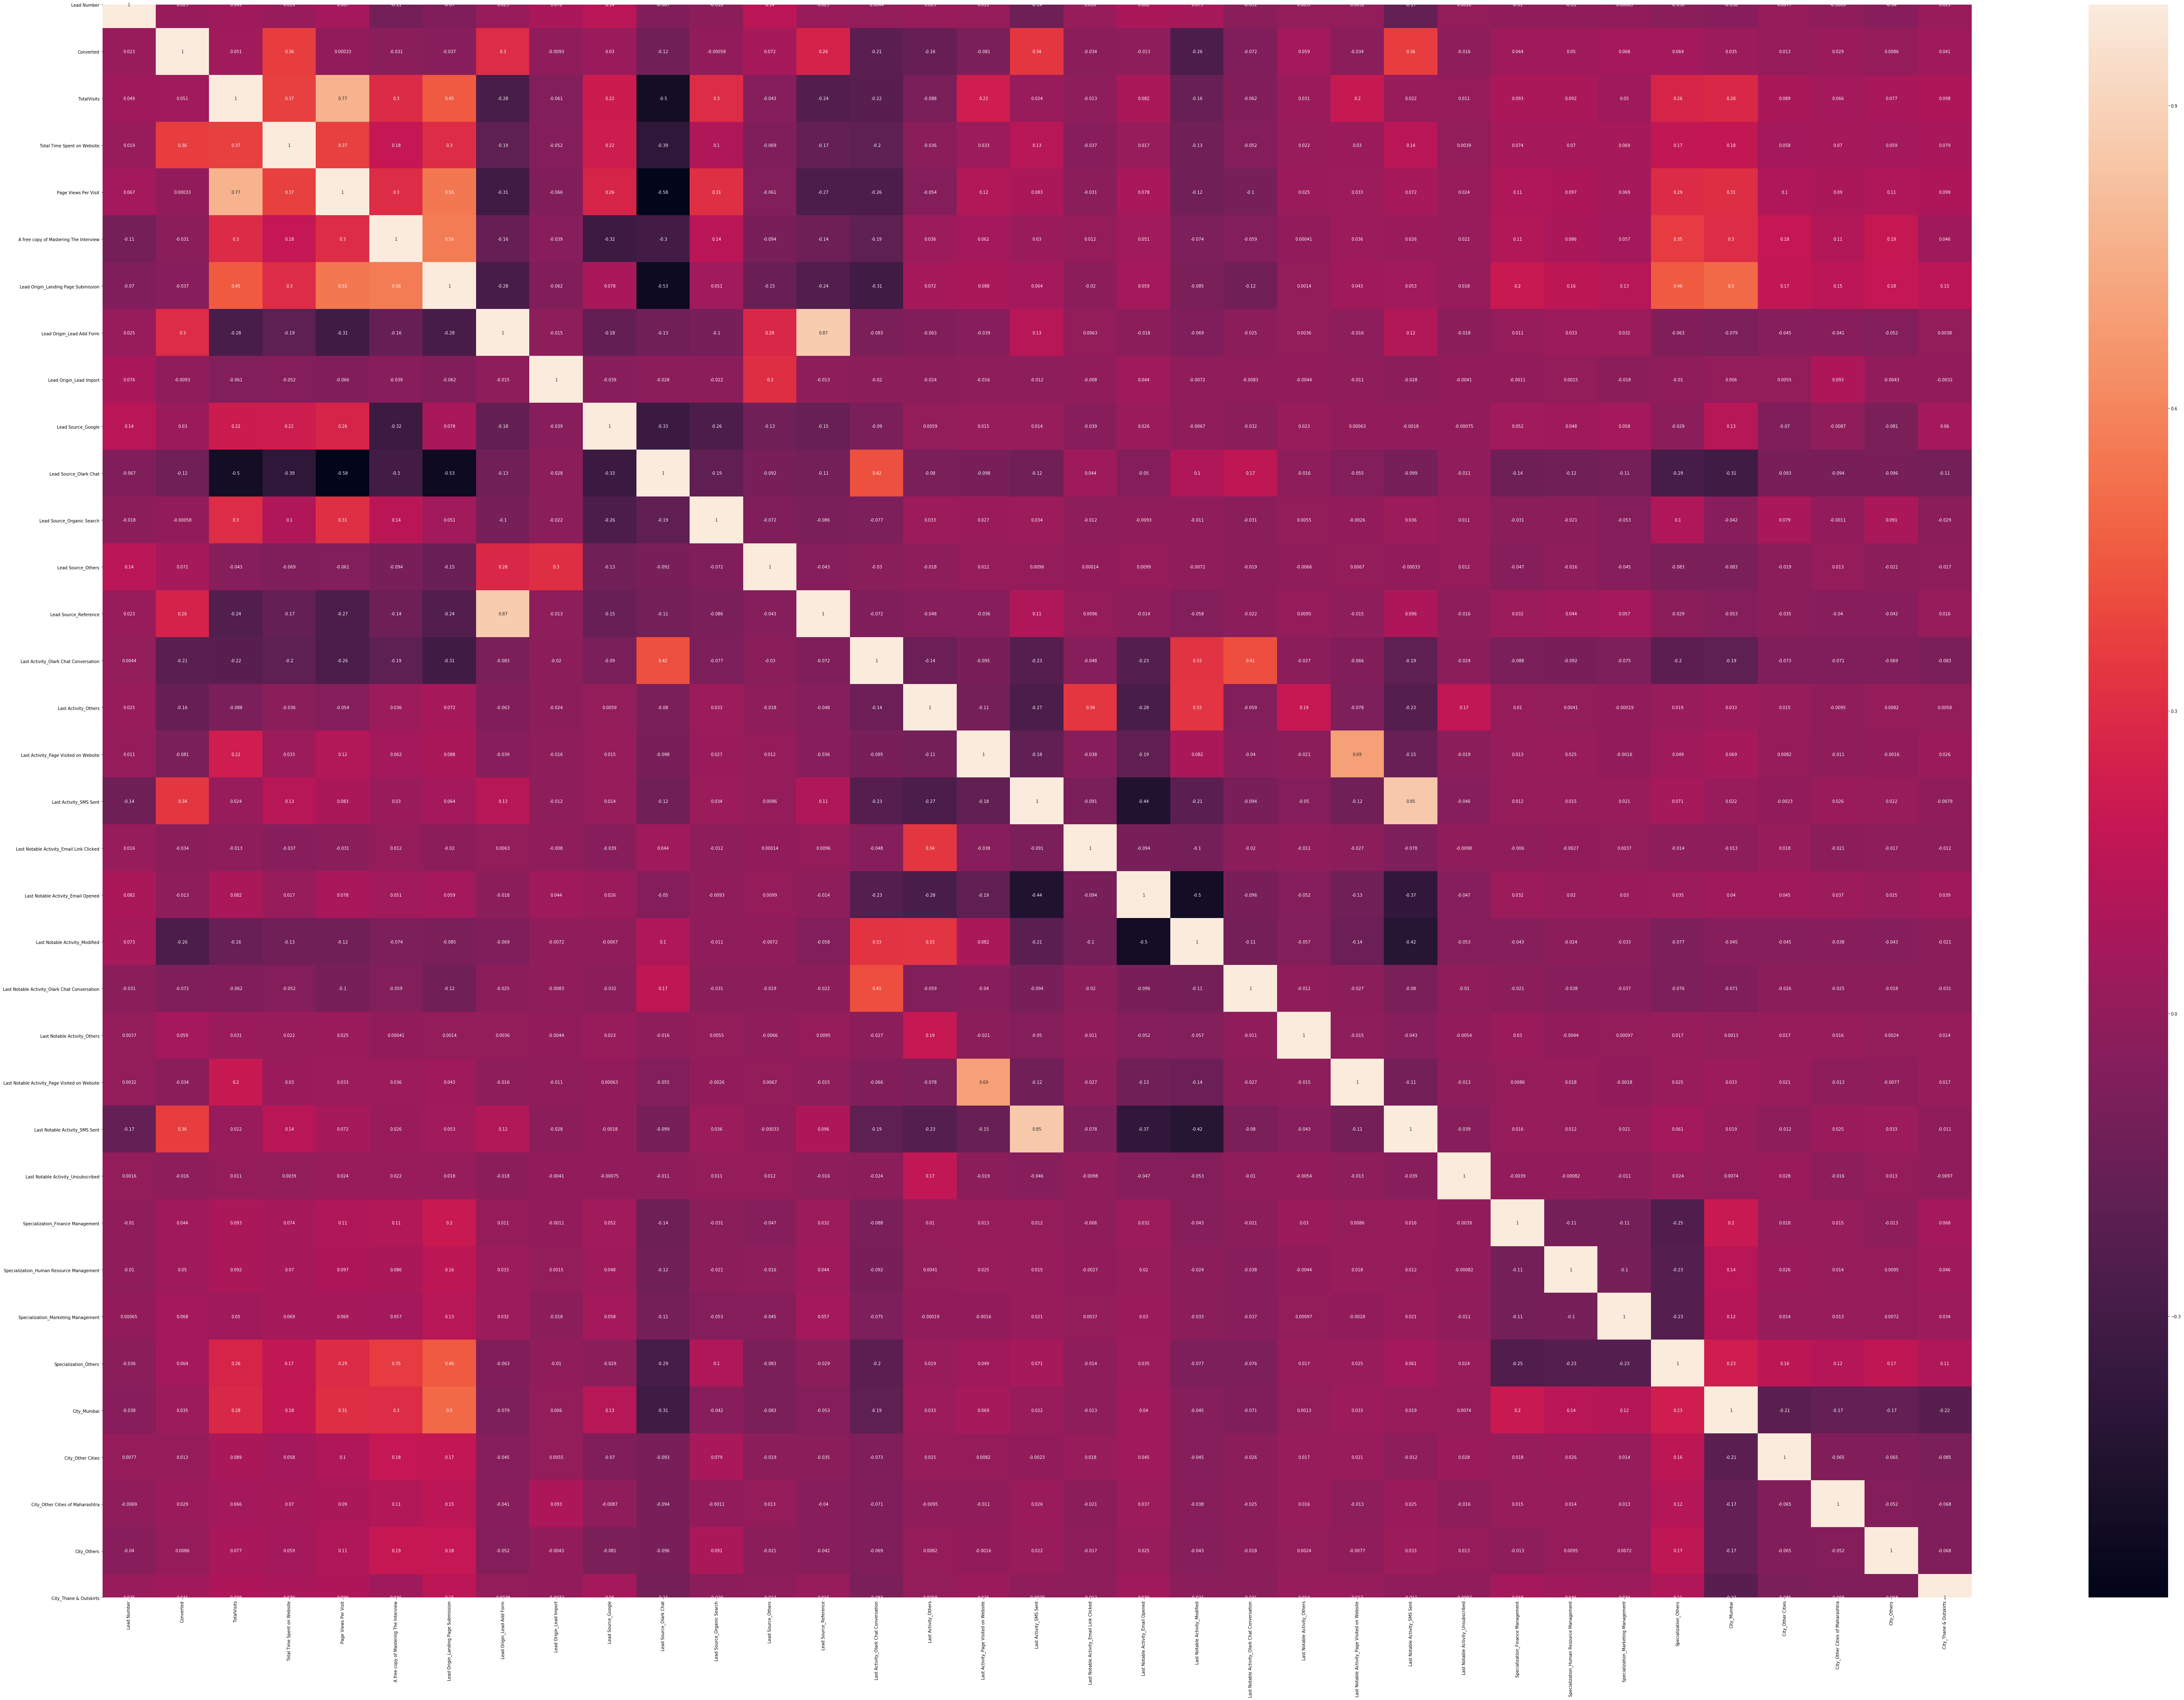

In [39]:
# # Let's see the correlation matrix 
plt.figure(figsize = (100,70))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

Closely observing the heat map, we can identify the two columns that can be dropped whiuch have high correlation with other variables.

They are 

Last Activity_SMS Sent (vs) Last Notable Activity_SMS Sent with a a value with 0.85 correlation

Lead Origin_Lead Add Form (vs) Lead Source_Reference with a correlation value 0.87 correlation


Either of the columns in each set can be removed.

In [40]:
X_test = X_test.drop(['Last Activity_SMS Sent','Lead Origin_Lead Add Form'],1)
X_train = X_train.drop(['Last Activity_SMS Sent','Lead Origin_Lead Add Form'],1)

# 3 : Model Building

Running first training Model

In [41]:
import statsmodels.api as sm

In [42]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.6
Date:                Mon, 07 Sep 2020   Deviance:                       5555.2
Time:                        23:49:59   Pearson chi2:                 6.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4397      0.515     -2.797      0.005      -2.449      -0.431
TotalVisits                                       0.2380      0.054      4.395      0.000       0.132       0.344
Total Time Spent on Website                       1.1080      0.040     28.022      0.000       1.031       1.186
Page Views Per Visit                             -0.4321      0.060     -7.147      0.000      -0.551      -0.314
A free copy of Mastering The Interview           -0.3123      0.107     -2.921      0.003      -0.522      -0.103
Lead Origin_Landing Page Submission              -1.2224      0.144     -8.492      0.000      -1.505      -0.940
Lead Origin_Lead Import                          -1.6125      0.491     -3.283      0.001      -2.575      -0.650
Lead Source_Google                                0.2191      0.111      1.968      0.049       0.001       0.437
Lead Source_Olark Chat                            0.9794      0.159      6.145      0.000       0.667       1.292
Lead Source_Organic Search                        0.2407      0.126      1.904      0.057      -0.007       0.489
Lead Source_Others                                2.1202      0.200     10.602      0.000       1.728       2.512
Lead Source_Reference                             3.3015      0.262     12.584      0.000       2.787       3.816
Last Activity_Olark Chat Conversation            -1.5493      0.198     -7.825      0.000      -1.937      -1.161
Last Activity_Others                             -1.1459      0.160     -7.164      0.000      -1.459      -0.832
Last Activity_Page Visited on Website            -0.7438      0.213     -3.486      0.000      -1.162      -0.326
Last Notable Activity_Email Link Clicked          0.7239      0.534      1.355      0.175      -0.323       1.771
Last Notable Activity_Email Opened                0.0306      0.506      0.061      0.952      -0.961       1.022
Last Notable Activity_Modified                   -0.1802      0.495     -0.364      0.716      -1.151       0.790
Last Notable Activity_Olark Chat Conversation     0.1362      0.610      0.223      0.823      -1.059       1.331
Last Notable Activity_Others                      2.9390      0.608      4.837      0.000       1.748       4.130
Last Notable Activity_Page Visited on Website     0.0441      0.563      0.078      0.938      -1.058       1.147
Last Notable Activity_SMS Sent                    1.4545      0.507      2.870      0.004       0.461       2.448
Last Notable Activity_Unsubscribed                0.9568      0.665      1.439      0.150      -0.347       2.261
Specialization_Finance Management                 1.3032      0.186      7.008      0.000       0.939       1.668
Speci

### 3.1 Feature Selection using RFE


In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Instead of Standard 15 columns for RFE we will consider 20 columns to have better manually selection opportunity.

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [45]:
# selected column array after RFE
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False])

In [46]:
#Columns with RFE result and rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Notable Activity_Email Link Clicked', False, 10),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('Last Notable Activity_Page Visited on Website', False, 6),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Unsubscribed', False, 7),

#### The columns with Result 'True' and rank '1' are selected post RFE.


In [47]:
# Reading supported columns in col
col = X_train.columns[rfe.support_]

In [48]:
# Checking the columns which were eliminated from the analysis
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Others',
       'City_Thane & Outskirts'],
      dtype='object')

### 3.2 Assessing the model with statmodels

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.9
Date:                Mon, 07 Sep 2020   Deviance:                       5617.9
Time:                        23:50:02   Pearson chi2:                 6.36e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7520      0.211     -3.572      0.000      -1.165      -0.339
Total Time Spent on Website                       1.1041      0.039     28.147      0.000       1.027       1.181
A free copy of Mastering The Interview           -0.3019      0.085     -3.533      0.000      -0.469      -0.134
Lead Origin_Landing Page Submission              -1.2860      0.130     -9.927      0.000      -1.540      -1.032
Lead Origin_Lead Import                          -1.2545      0.480     -2.616      0.009      -2.194      -0.315
Lead Source_Olark Chat                            1.0449      0.122      8.597      0.000       0.807       1.283
Lead Source_Others                                2.0295      0.178     11.391      0.000       1.680       2.379
Lead Source_Reference                             3.3784      0.238     14.208      0.000       2.912       3.844
Last Activity_Olark Chat Conversation            -1.5590      0.198     -7.882      0.000      -1.947      -1.171
Last Activity_Others                             -1.0538      0.150     -7.040      0.000      -1.347      -0.760
Last Activity_Page Visited on Website            -0.8555      0.186     -4.600      0.000      -1.220      -0.491
Last Notable Activity_Email Opened               -0.4262      0.204     -2.092      0.036      -0.825      -0.027
Last Notable Activity_Modified                   -0.6551      0.176     -3.731      0.000      -0.999      -0.311
Last Notable Activity_Olark Chat Conversation    -0.2486      0.393     -0.632      0.527      -1.019       0.522
Last Notable Activity_Others                      2.3718      0.408      5.814      0.000       1.572       3.171
Last Notable Activity_SMS Sent                    0.9456      0.206      4.582      0.000       0.541       1.350
Specialization_Finance Management                 1.4531      0.159      9.112      0.000       1.141       1.766
Specialization_Human Resource Management          1.4201      0.157      9.032      0.000       1.112       1.728
Specialization_Marketing Management               1.5688      0.156     10.038      0.000       1.262       1.875
Specialization_Others                             1.3620      0.131     10.400      0.000       1.105       1.619
City_Mumbai                                       0.1233      0.082      1.502      0.133      -0.038       0.284
=================================================================================================================
"""

#### The 'Last Notable Activity_Olark Chat Conversation'  and City_Mumbai columns are  with p>0.05.As they are treated insignificant for the same reason they  can be dropped .

In [50]:
# Dropping 'Last Notable Activity_Olark Chat Conversation' column
col=col.drop('Last Notable Activity_Olark Chat Conversation',1)

In [51]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.1
Date:                Mon, 07 Sep 2020   Deviance:                       5618.3
Time:                        23:50:02   Pearson chi2:                 6.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8027      0.195     -4.121      0.000      -1.185      -0.421
Total Time Spent on Website                  1.1030      0.039     28.155      0.000       1.026       1.180
A free copy of Mastering The Interview      -0.3024      0.085     -3.540      0.000      -0.470      -0.135
Lead Origin_Landing Page Submission         -1.2881      0.130     -9.944      0.000      -1.542      -1.034
Lead Origin_Lead Import                     -1.2578      0.480     -2.623      0.009      -2.198      -0.318
Lead Source_Olark Chat                       1.0449      0.122      8.594      0.000       0.807       1.283
Lead Source_Others                           2.0304      0.178     11.400      0.000       1.681       2.379
Lead Source_Reference                        3.3764      0.238     14.199      0.000       2.910       3.842
Last Activity_Olark Chat Conversation       -1.6095      0.183     -8.784      0.000      -1.969      -1.250
Last Activity_Others                        -1.0380      0.147     -7.049      0.000      -1.327      -0.749
Last Activity_Page Visited on Website       -0.8278      0.180     -4.590      0.000      -1.181      -0.474
Last Notable Activity_Email Opened          -0.3756      0.187     -2.003      0.045      -0.743      -0.008
Last Notable Activity_Modified              -0.6044      0.156     -3.865      0.000      -0.911      -0.298
Last Notable Activity_Others                 2.4061      0.405      5.948      0.000       1.613       3.199
Last Notable Activity_SMS Sent               0.9961      0.190      5.232      0.000       0.623       1.369
Specialization_Finance Management            1.4552      0.160      9.124      0.000       1.143       1.768
Specialization_Human Resource Management     1.4230      0.157      9.051      0.000       1.115       1.731
Specialization_Marketing Management          1.5724      0.156     10.063      0.000       1.266       1.879
Specialization_Others                        1.3648      0.131     10.420      0.000       1.108       1.621
City_Mumbai                                  0.1228      0.082      1.498      0.134      -0.038       0.284
============================================================================================================
"""

The column City_Mumbai need to be dropped.

In [53]:
# Dropping 'City_Mumbai' column
col=col.drop('City_Mumbai',1)

In [54]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.3
Date:                Mon, 07 Sep 2020   Deviance:                       5620.5
Time:                        23:50:03   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8009      0.195     -4.111      0.000      -1.183      -0.419
Total Time Spent on Website                  1.1017      0.039     28.151      0.000       1.025       1.178
A free copy of Mastering The Interview      -0.3048      0.085     -3.570      0.000      -0.472      -0.137
Lead Origin_Landing Page Submission         -1.2572      0.128     -9.837      0.000      -1.508      -1.007
Lead Origin_Lead Import                     -1.2211      0.479     -2.549      0.011      -2.160      -0.282
Lead Source_Olark Chat                       1.0391      0.121      8.554      0.000       0.801       1.277
Lead Source_Others                           2.0226      0.178     11.369      0.000       1.674       2.371
Lead Source_Reference                        3.3749      0.238     14.191      0.000       2.909       3.841
Last Activity_Olark Chat Conversation       -1.6093      0.183     -8.782      0.000      -1.968      -1.250
Last Activity_Others                        -1.0397      0.147     -7.060      0.000      -1.328      -0.751
Last Activity_Page Visited on Website       -0.8214      0.180     -4.556      0.000      -1.175      -0.468
Last Notable Activity_Email Opened          -0.3715      0.187     -1.982      0.047      -0.739      -0.004
Last Notable Activity_Modified              -0.5999      0.156     -3.836      0.000      -0.906      -0.293
Last Notable Activity_Others                 2.4033      0.404      5.953      0.000       1.612       3.195
Last Notable Activity_SMS Sent               0.9989      0.190      5.246      0.000       0.626       1.372
Specialization_Finance Management            1.5032      0.156      9.610      0.000       1.197       1.810
Specialization_Human Resource Management     1.4642      0.155      9.452      0.000       1.161       1.768
Specialization_Marketing Management          1.6103      0.154     10.442      0.000       1.308       1.913
Specialization_Others                        1.3974      0.129     10.812      0.000       1.144       1.651
============================================================================================================
"""

'Last Notable Activity_Unsubscribed' column need to be removed as it has p value which is almost 0.05

NO variable with p value>0.05 now.

### 3.3 Checking the VIFs


In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.51
17,Specialization_Others,4.92
11,Last Notable Activity_Modified,2.57
10,Last Notable Activity_Email Opened,2.30
1,A free copy of Mastering The Interview,2.22
14,Specialization_Finance Management,2.19
4,Lead Source_Olark Chat,2.15
13,Last Notable Activity_SMS Sent,2.10
15,Specialization_Human Resource Management,1.98
16,Specialization_Marketing Management,1.90


### 3.4 Dropping the variable and updating the model

As you can see from VIF dataframe, some variables are still need to be removed. One of these variables is, `Lead Origin_Landing Page Submission` and 'Specialization_Others' as it has high VIF >3.  

In [57]:
# Dropping 'Lead Origin_Landing Page Submission' column
col=col.drop('Lead Origin_Landing Page Submission',1)

In [58]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.7
Date:                Mon, 07 Sep 2020   Deviance:                       5721.4
Time:                        23:50:05   Pearson chi2:                 6.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0253      0.192     -5.328      0.000      -1.402      -0.648
Total Time Spent on Website                  1.1217      0.039     28.843      0.000       1.045       1.198
A free copy of Mastering The Interview      -0.5112      0.082     -6.223      0.000      -0.672      -0.350
Lead Origin_Lead Import                     -0.7340      0.460     -1.594      0.111      -1.636       0.169
Lead Source_Olark Chat                       1.4279      0.115     12.389      0.000       1.202       1.654
Lead Source_Others                           2.2625      0.175     12.904      0.000       1.919       2.606
Lead Source_Reference                        4.1052      0.225     18.205      0.000       3.663       4.547
Last Activity_Olark Chat Conversation       -1.5616      0.180     -8.657      0.000      -1.915      -1.208
Last Activity_Others                        -1.0770      0.146     -7.394      0.000      -1.362      -0.791
Last Activity_Page Visited on Website       -0.8464      0.179     -4.733      0.000      -1.197      -0.496
Last Notable Activity_Email Opened          -0.3878      0.185     -2.091      0.036      -0.751      -0.024
Last Notable Activity_Modified              -0.6185      0.155     -3.990      0.000      -0.922      -0.315
Last Notable Activity_Others                 2.5084      0.404      6.214      0.000       1.717       3.300
Last Notable Activity_SMS Sent               0.9424      0.188      5.002      0.000       0.573       1.312
Specialization_Finance Management            0.7025      0.131      5.368      0.000       0.446       0.959
Specialization_Human Resource Management     0.7218      0.132      5.479      0.000       0.464       0.980
Specialization_Marketing Management          0.9045      0.133      6.781      0.000       0.643       1.166
Specialization_Others                        0.6441      0.101      6.365      0.000       0.446       0.842
============================================================================================================
"""

Since P Value for Lead Origin_Lead Import is >0.05 we will remove this column and run our model again.

In [59]:
# Dropping 'Lead Origin_Lead Import' column
col=col.drop('Lead Origin_Lead Import',1)

In [60]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.0
Date:                Mon, 07 Sep 2020   Deviance:                       5724.0
Time:                        23:50:05   Pearson chi2:                 6.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0226      0.192     -5.318      0.000      -1.400      -0.646
Total Time Spent on Website                  1.1237      0.039     28.907      0.000       1.047       1.200
A free copy of Mastering The Interview      -0.5059      0.082     -6.161      0.000      -0.667      -0.345
Lead Source_Olark Chat                       1.4249      0.115     12.370      0.000       1.199       1.651
Lead Source_Others                           2.1691      0.165     13.178      0.000       1.846       2.492
Lead Source_Reference                        4.1089      0.225     18.223      0.000       3.667       4.551
Last Activity_Olark Chat Conversation       -1.5568      0.180     -8.639      0.000      -1.910      -1.204
Last Activity_Others                        -1.0701      0.146     -7.354      0.000      -1.355      -0.785
Last Activity_Page Visited on Website       -0.8371      0.179     -4.687      0.000      -1.187      -0.487
Last Notable Activity_Email Opened          -0.3881      0.185     -2.094      0.036      -0.751      -0.025
Last Notable Activity_Modified              -0.6163      0.155     -3.980      0.000      -0.920      -0.313
Last Notable Activity_Others                 2.5080      0.404      6.215      0.000       1.717       3.299
Last Notable Activity_SMS Sent               0.9494      0.188      5.044      0.000       0.580       1.318
Specialization_Finance Management            0.6889      0.131      5.276      0.000       0.433       0.945
Specialization_Human Resource Management     0.7091      0.131      5.394      0.000       0.451       0.967
Specialization_Marketing Management          0.8957      0.133      6.722      0.000       0.635       1.157
Specialization_Others                        0.6319      0.101      6.266      0.000       0.434       0.830
============================================================================================================
"""

We will check the VIF for our model again

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Specialization_Others,3.03
9,Last Notable Activity_Modified,2.49
8,Last Notable Activity_Email Opened,2.18
1,A free copy of Mastering The Interview,2.09
11,Last Notable Activity_SMS Sent,1.98
2,Lead Source_Olark Chat,1.96
5,Last Activity_Olark Chat Conversation,1.68
6,Last Activity_Others,1.61
12,Specialization_Finance Management,1.57
13,Specialization_Human Resource Management,1.49


### All columns are having Low values for VIF(VIF<3) as well as 0 p-value, hence  no columns need to be dropped any further and we can consider using above data for further analysis

In [62]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

3009    0.198353
1012    0.062760
9226    0.226083
4750    0.940053
7987    0.795412
1281    0.845551
2880    0.150607
4971    0.942231
7536    0.735580
1248    0.673459
1429    0.722049
2178    0.079091
8554    0.104216
5044    0.583009
3475    0.609252
dtype: float64

In [63]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.19835325, 0.06276036, 0.22608299, 0.9400526 , 0.7954118 ,
       0.8455508 , 0.15060665, 0.94223124, 0.73558042, 0.67345895,
       0.72204909, 0.07909119, 0.10421594, 0.58300931, 0.60925151])

### 3.5 Creating a dataframe having Converted and Converted prediction probability as a column.

In [64]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number
0,0,0.198353,3009
1,0,0.062760,1012
2,0,0.226083,9226
3,1,0.940053,4750
4,1,0.795412,7987


### 3.6 Creating new column 'Predicted' for Conv_prob > 0.5, here we have taken >0.5 as a standard cut off to get an understanding of our data

In [65]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted
0,0,0.198353,3009,0
1,0,0.062760,1012,0
2,0,0.226083,9226,0
3,1,0.940053,4750,1
4,1,0.795412,7987,1


In [66]:
from sklearn import metrics

### 3.7 Creating Confusion matrix

In [67]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3365  540]
 [ 782 1664]]


### 3.8 Checking the overall accuracy of the model

In [68]:
### Checking the overall accuracy of the model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.7918438041253346


# 4 : Model Evaluation

#### We will calculate and visualize other metrics that provides more insight than accuracy.

Creating confusion Matrix

In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### 4.1 Getting Sensitivity, Specificity, False positive rate, Positive & Negative predictive value.

#### Sensitivity

In [70]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.6802943581357318

#### Specificity

In [71]:
#calculate specificity
TN / float(TN+FP)

0.8617157490396927

#### False positive rate

In [72]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1382842509603073


#### Positive predictive value

In [73]:
# positive predictive value 
print (TP / float(TP+FP))

0.7549909255898367


#### Negative predictive value

In [74]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8114299493609839


### 4.2 ROC Curve

#### Plotting of ROC curve as it demonstrates below points :

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


Formula to draw ROC

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

### 4.3 ROC GRAPH

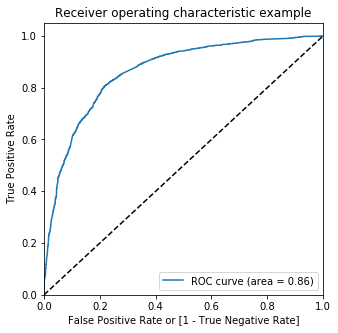

In [77]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### 4.4 Finding Optimal Cutoff Point

In [78]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.198353,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.062760,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.226083,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.940053,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.795412,7987,1,1,1,1,1,1,1,1,1,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_leads = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_leads.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_leads)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.579909  0.969747  0.335723
0.2   0.2  0.715320  0.920687  0.586684
0.3   0.3  0.779090  0.835241  0.743918
0.4   0.4  0.790899  0.768193  0.805122
0.5   0.5  0.791844  0.680294  0.861716
0.6   0.6  0.776256  0.559280  0.912164
0.7   0.7  0.761455  0.469338  0.944430
0.8   0.8  0.720989  0.328700  0.966709
0.9   0.9  0.679893  0.192150  0.985403


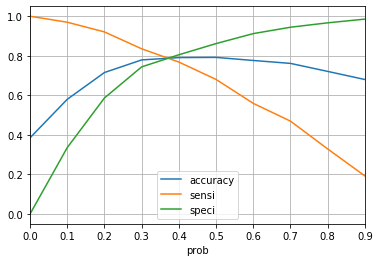

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_leads.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

#### From the above graph we can see that cutoff point near 0.32 of prob gives us more than 0.8% SENSITIVITY

Using this cutoff point as a threshold point

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.198353,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.062760,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.226083,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.940053,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.795412,7987,1,1,1,1,1,1,1,1,1,0,0,1


### 4.5 Accuracy of the model

In [82]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7844433947409857

#### Creating confusion matrix again

In [83]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2962,  943],
       [ 426, 2020]], dtype=int64)

In [84]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [85]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8258381030253475

#### Specificity

In [86]:
# Let us calculate specificity
TN / float(TN+FP)

0.7585147247119078

#### False positive rate

In [87]:
(FP/ float(TN+FP))

0.2414852752880922

#### Positive predictive value

In [88]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6817414782315221


#### Negative predictive value

In [89]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8742621015348289


### 4.6 Checking Precision and Recall

In [90]:
# Confusion Matrix 

In [91]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3365,  540],
       [ 782, 1664]], dtype=int64)

#### Precision
TP / TP + FP

In [92]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7549909255898367

#### Recall
TP / TP + FN

In [93]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6802943581357318

### 4.7 Precision and recall tradeoff

In [94]:
from sklearn.metrics import precision_score, recall_score

In [95]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7549909255898367

In [96]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6802943581357318

In [97]:
### Precision and Recall tradeoff

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    1
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

#### Using plot to understand the optimum precision and recall scale

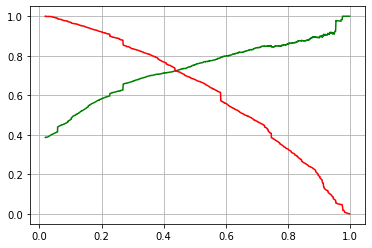

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

# 5 Predictions on the Test Set

In [102]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [103]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others
3271,-0.606338,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1490,1.970301,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7936,-0.764053,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4216,-0.904666,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3830,-0.593037,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [104]:
X_test_sm = sm.add_constant(X_test)

### 5.1 Making predictions on the test set

In [105]:
y_test_pred = res.predict(X_test_sm)

In [106]:
y_test_pred[:15]

3271    0.109870
1490    0.716908
7936    0.093698
4216    0.889463
3830    0.124429
1800    0.163399
6507    0.473706
4821    0.312576
4223    0.953430
4714    0.226083
3977    0.360040
4209    0.058013
2320    0.046881
3744    0.058013
2570    0.354643
dtype: float64

In [107]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [108]:
# Head of the dataframe
y_pred_1.head()

,0
3271,0.109870
1490,0.716908
7936,0.093698
4216,0.889463
3830,0.124429


In [109]:
# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)

In [110]:
# Putting Lead Number to index
y_test_leads['Lead Number'] = y_test_leads.index

In [111]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

In [112]:
# Appending y_test_leads and y_pred_1
y_pred_final = pd.concat([y_test_leads, y_pred_1],axis=1)

In [113]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.109870
1,1,1490,0.716908
2,0,7936,0.093698
3,1,4216,0.889463
4,0,3830,0.124429


In [114]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [115]:
# Rearranging the columns
y_pred_final= y_pred_final.reindex(['Lead Number','Converted','Conv_Prob'], axis=1)

In [116]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conv_Prob
0,3271,0,0.109870
1,1490,1,0.716908
2,7936,0,0.093698
3,4216,1,0.889463
4,3830,0,0.124429


In [117]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [118]:
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted
0,3271,0,0.109870,0
1,1490,1,0.716908,1
2,7936,0,0.093698,0
3,4216,1,0.889463,1
4,3830,0,0.124429,0


### 5.2 Getting Accuracy, Sensitivity, Specificity, False positive rate, Positive & Negative predictive value.

#### Accuracy

In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7767168564083731

#### Creating confusion matrix again for test data

In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1319,  415],
       [ 193,  796]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8048533872598584

#### Specificity

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.7606689734717417

### 5.3 Generating Score Variable

In [124]:
y_pred_final['Score']=round(y_pred_final['Conv_Prob']*100,2)
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted,Score
0,3271,0,0.109870,0,10.99
1,1490,1,0.716908,1,71.69
2,7936,0,0.093698,0,9.37
3,4216,1,0.889463,1,88.95
4,3830,0,0.124429,0,12.44


In [125]:
y_pred_final.shape

(2723, 5)

### Analysis

The top 15 variables which contribute to the lead conversion were identified .
    Out of which the top Three variables which will influence the lead conversion are:
     Top 3 categorical variables:   
1.Lead source_Reference
2.Last notable activity_others
3.Lead Souce_others

Top 3 variables:
    1.Lead Source
    2.Last Notable Activity
    3.Specialization
The Sensitivity was found to be 0.8089
and specificity as 0.7601
